First let's do the discrete fourier transform since it's easier. The FFT algorithm looks simple, but the derivation is more involved (since it's clever!).

- First let's define that a larger more complicated wave can be separated into the sum of pure sine or cosine waves.
- We can define a single pure wave with a frequency and amplitude.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("dark_background")

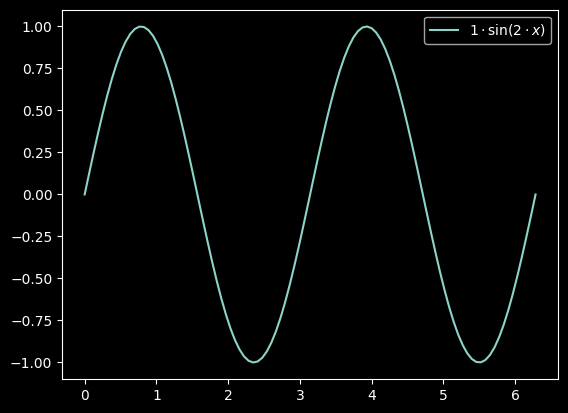

In [27]:
# pure sine wave where we can increase the number of crests and increase the size of the crest
amplitude = 1
frequency = 2
x = np.linspace(0, 2*np.pi, 100)
y = amplitude*np.sin((frequency)*x)
plt.plot(x, y, label=fr"${amplitude}\cdot \sin ({frequency} \cdot x)$")
plt.legend()

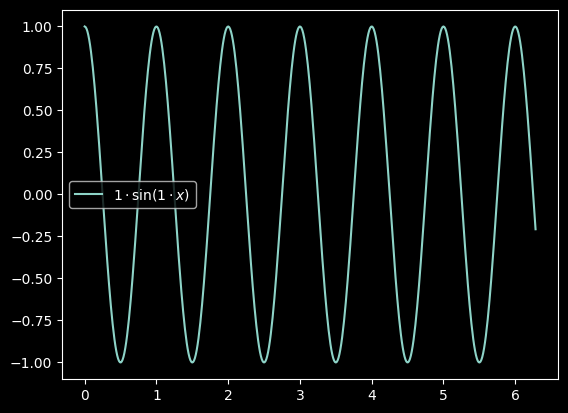

In [37]:
# pure cosine wave where we can increase the number of crests and increase the size of the crest
amplitude = 1
frequency = 1
x = np.linspace(0, 2*np.pi, 500)
y = amplitude*np.cos((frequency)*2*np.pi*x)
plt.plot(x, y, label=fr"${amplitude}\cdot \sin ({frequency} \cdot x)$")
plt.legend()

Eulers states that $$e^{i \theta} = \cos(\theta) + i \sin(\theta)$$

So if we take the real part of the equation above, we just get $\cos(\theta)$ and if we take the complex we get $\sin(\theta)$

In [34]:
theta = np.pi
a = np.exp(theta*1j)
print(f"{np.real(a)=}, {np.imag(a)=}")
print(f"{np.cos(theta)=}, {np.sin(theta)=}")

np.real(a)=-1.0, np.imag(a)=1.2246467991473532e-16
np.cos(theta)=-1.0, np.sin(theta)=1.2246467991473532e-16


Which basically just gives us simpler notation to define cases where we operate on pure waves. In the case of the discrete fourier transform, we can just use the complex for and retain both answers later on. 

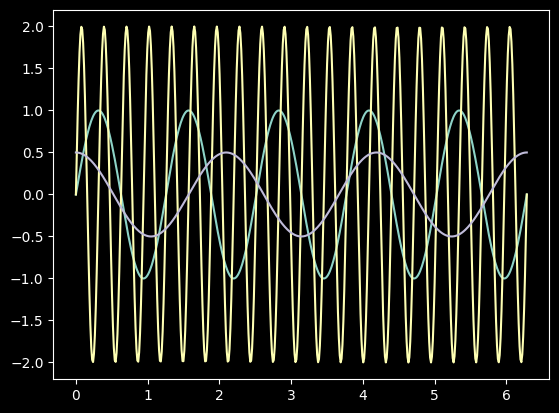

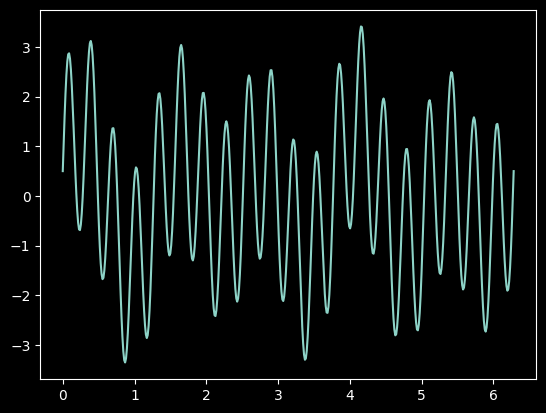

In [83]:
pure = [np.sin(5*x), 2*np.sin(20*x), 0.5*np.cos(3*x)]
combined = np.vstack(pure).sum(axis=0)
for p in pure:
	plt.plot(x, p)

plt.show()
plt.plot(x, combined)

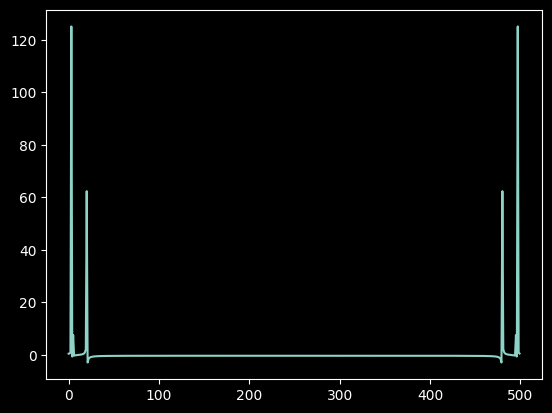

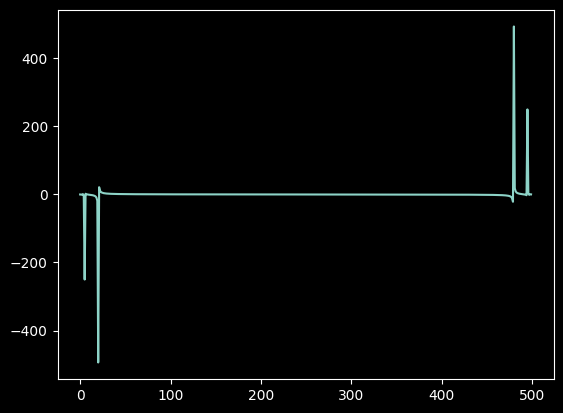

In [95]:
plt.plot(np.real(np.fft.fft(combined)))
plt.show()
plt.plot(np.imag(np.fft.fft(combined)))

Discrete fourier transform is the act multiplying a data input by a sin wave and if the peak is increased, we have some overlap. 

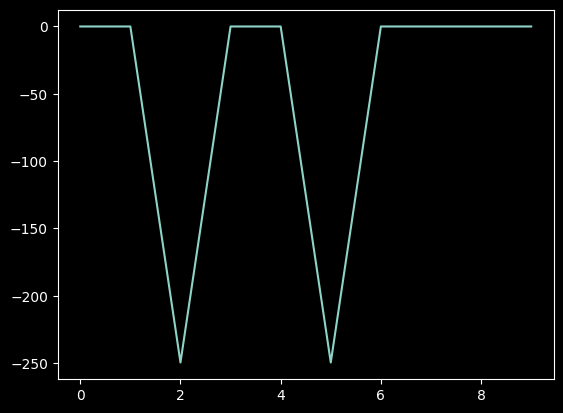

In [149]:
N = 10

c = np.sin(5*x) + np.sin(2*x) + np.cos(5*x)

sums = np.zeros((N))

for i in range(N):
	sums[i] = np.sin(-i*x).dot(c)
plt.show()
plt.plot(sums)


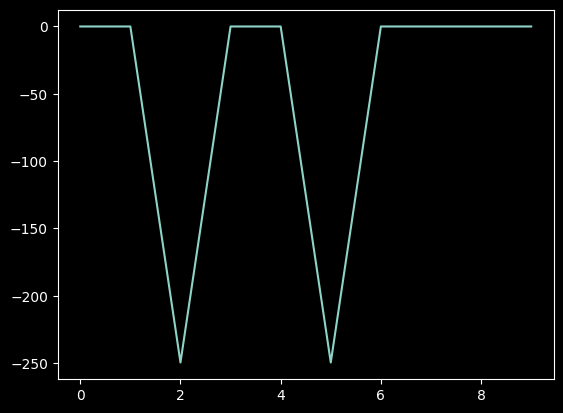

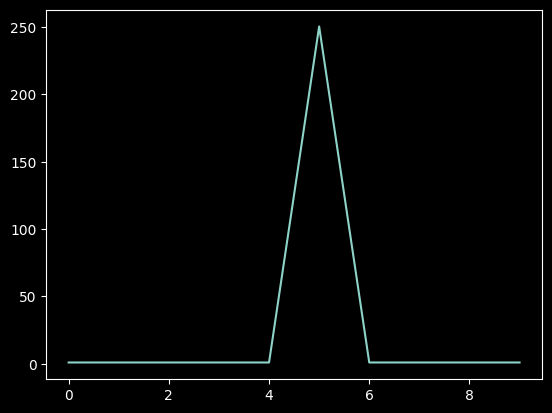

In [148]:
N = 10

c = np.sin(5*x) + np.sin(2*x) + np.cos(5*x)

sums = np.zeros((N), dtype=np.complex128)

for i in range(N):
	W = np.exp(-1j*i*x)
	sums[i] = c.dot(W)
plt.plot(np.imag(sums))
plt.show()
plt.plot(np.real(sums))


To change the curve to be wrt rotations per second, I can just multiply by $2 \pi i$ since that determines one rotation when $t=1$

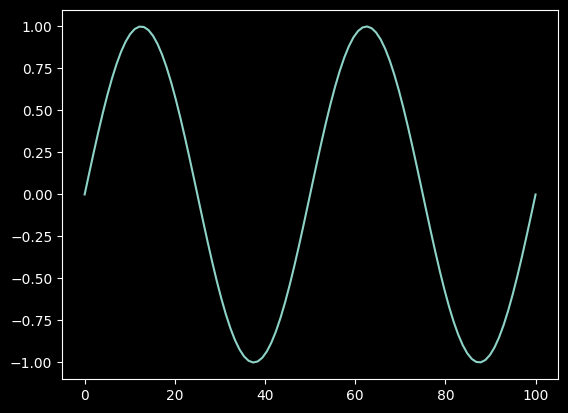

In [ ]:
freq = 2/100
t = 100
xt = np.linspace(0, t, 100)
twopi = 2*np.pi
yt = np.sin(twopi*freq*xt)
plt.plot(xt, yt)

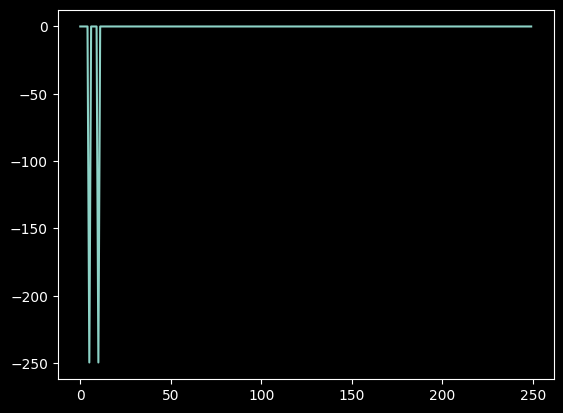

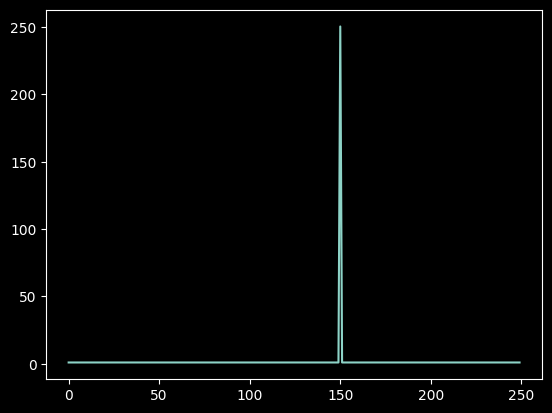

In [155]:
N = len(x)

c = np.sin(5*x) + np.sin(10*x) + np.cos(150*x)

sums = np.zeros((N//2), dtype=np.complex128)
f = np.arange(N//2)
for i in range(N//2):
	W = np.exp(-1j*f[i]*x)
	sums[i] = c.dot(W)
plt.plot(f, np.imag(sums))
plt.show()
plt.plot(f, np.real(sums))